In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/dataset_168.csv?raw=true'
data_96 = pd.read_csv(data_url)
data_96 = data_96.drop(columns='Unnamed: 0')
rf_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/RF_output_168.csv?raw=true'
rf_preds = pd.read_csv(rf_url, index_col=0)
ev_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/evoutput.csv?raw=true'
ev_preds = pd.read_csv(ev_url)
ann_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/ann_output_168.csv?raw=true'
ann_preds = pd.read_csv(ann_url, index_col=0)
lstm_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/LSTM_output_168.csv?raw=true'
lstm_preds = pd.read_csv(lstm_url, index_col=0)

In [ ]:
print(data_96.shape)
data_96.head()

(20736, 192)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,28667,28204,27781,27139,26687,26333,27611,27355,27166,26848,26485,26280,25908,25577,25239,24848,24595,24276,23817,23649,23382,23084,22628,22576,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,...,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202,22176,22166,21877,21877,21921,21656,21931,22094,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191
1,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,20023,19911,19555,19302,19122,19047,19138,19104,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,...,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191,29358,31027,31593,31469,31660,32221,32357,33081,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063
2,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,20456,20756,21105,21251,21177,21410,21634,21843,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,...,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063,35805,35941,35793,35919,35988,35896,35361,35551,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828
3,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,...,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828,32562,32896,32926,33004,33149,33020,33128,33524,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086
4,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,...,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086,37075,36995,36888,36798,36881,36748,36815,37104,36868,36745,36510,35928,35374,34872,34608,34415,34366,34372,34358,34704,34911,34351,34008,33765


In [ ]:
print(rf_preds.shape)
rf_preds.head()

(20736, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22211.658589,22125.877049,21895.158073,21989.810257,21941.453552,21853.835564,21812.745948,21732.080431,21671.431116,21901.489331,21907.032817,22158.701625,21920.876992,22193.801200,22616.986486,23077.483598,22911.342454,23857.959814,24810.513307,24828.915190,25585.043041,26575.851256,26766.505697,26547.000838
1,29397.094706,30106.556597,30373.022749,30617.771649,30719.254804,31140.330588,31364.429957,31794.172186,32173.736686,32430.789388,32365.684178,32510.647962,32494.168607,32922.012079,32536.386859,32321.099871,32378.507058,32462.318209,32199.816396,32860.443262,33533.666603,32164.309196,31589.849519,31298.806689
2,36067.451148,36015.483132,35972.364557,36115.888127,36195.295415,36077.935713,35458.207610,35350.640046,35006.604490,34718.787943,34306.086349,33443.429225,32222.230448,31864.317404,31871.407547,31402.046054,31725.573818,31695.813190,31910.774100,32109.384582,32690.090107,32153.180558,31522.047401,31371.946216
3,32831.851796,32721.115515,33010.348066,32971.211682,33504.070876,33561.888461,33689.550000,34003.926912,33807.858823,33866.691079,33525.167725,34033.067324,33481.270172,33381.551078,33341.334851,33780.283989,33890.785223,34360.913463,34423.754257,34830.357536,34627.835214,34441.226074,34578.529235,34506.900526
4,37041.227431,37033.335090,37158.710743,37142.808459,37003.304585,37048.589379,37037.314097,37026.440679,37069.599008,36758.387549,36503.585014,36227.375063,36201.354934,35528.479207,35129.457072,35051.341872,34371.744746,34121.108955,33434.995829,34287.548622,33691.217790,32563.260322,31320.892947,31269.836429


In [ ]:
ev_preds = ev_preds[3:]
print(ev_preds.shape)
ev_preds.head()

(20736, 24)


,pred,pred.1,pred.2,pred.3,pred.4,pred.5,pred.6,pred.7,pred.8,pred.9,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19,pred.20,pred.21,pred.22,pred.23
3,22373.461672,22078.679245,22580.239696,22237.378254,21692.734093,21117.589844,22895.984615,21050.725676,22101.125378,20946.645441,22977.333333,21275.550725,21419.908133,26967.186667,22474.196629,21132.490872,21872.004505,23413.950000,31516.489079,22415.944615,22124.678959,28657.507937,23748.626437,27192.053640
4,28657.795676,28984.652284,29132.692308,30484.316667,31371.673267,29370.980892,29393.532508,32065.542614,32274.278571,32714.153846,28203.283069,32941.512295,34457.544231,31538.531250,31419.494475,32056.569620,31783.127973,29879.053512,33306.016216,34604.168317,32460.729469,34092.774194,33515.993631,32828.672727
5,36264.218798,36197.573090,36052.049573,35329.983498,34747.571630,36251.694836,35398.970912,35292.676641,35108.918261,35516.075047,35574.384161,35837.504037,34704.646048,36778.544690,27029.450980,34922.086006,36106.649030,33794.971897,33441.435624,34183.152381,32608.836032,32491.243125,33858.322350,33854.395413
6,32415.823052,32708.919740,33250.551492,31955.871835,32721.598093,33229.421348,31767.668639,32438.141538,32876.265823,33347.525606,33437.298990,33367.336842,32623.108365,31610.793570,32960.925065,31583.686636,33545.579710,34062.488682,35714.249431,35619.050691,35011.174497,35056.668407,33709.150725,33917.863372
7,37535.684211,37800.444056,37248.559921,37815.482143,36922.492063,36600.548822,38305.153042,36194.349367,37302.538378,35516.075047,34576.550296,37328.244624,33601.426009,34238.226852,34609.057181,31419.166023,33330.191011,32465.504225,31564.021201,34183.152381,35984.834661,29242.467005,33858.322350,28332.996610


In [ ]:
print(ann_preds.shape)
ann_preds.head()

(20736, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22196.550,22116.457,22005.432,21960.140,21758.768,21618.277,21403.895,21488.525,20928.387,21467.992,22103.658,21908.441,21692.818,22482.270,23011.096,23686.508,24177.047,24172.527,24315.834,25233.445,26368.854,26690.084,26682.190,27541.352
1,30015.236,30903.800,31855.727,31633.033,31809.643,32218.348,32210.207,32278.990,32504.414,33103.676,33765.156,33960.700,33879.000,34768.883,34608.363,34792.816,35624.637,35936.830,36088.960,36065.965,36772.305,36407.836,36129.703,36662.375
2,36215.170,36200.490,36169.816,36007.250,36500.348,36537.465,36049.016,36011.336,35727.740,35427.844,35540.234,34912.766,34434.360,34378.380,33864.855,33126.950,33304.230,33011.258,32423.553,32954.285,32935.720,33251.990,33152.960,33446.754
3,33000.000,33136.805,33093.810,33123.496,33281.060,33098.867,32812.953,33340.367,33322.684,33414.060,34016.758,34359.060,34566.840,35477.168,36147.060,36403.684,37020.020,36973.188,36534.152,36876.770,36904.203,36945.523,36693.582,37230.605
4,37318.770,36963.730,37047.984,36901.477,36870.316,36790.402,36300.330,36725.695,36906.640,36369.062,36424.195,35448.582,34984.420,35220.496,34363.586,34264.344,34194.387,33731.305,33182.543,33821.883,33930.957,34072.530,32957.980,33500.010


In [ ]:
print(lstm_preds.shape)
lstm_preds.head()

(20736, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,20981.262831,21643.157094,21589.380176,21668.527727,20862.401155,22528.309875,21023.153607,20904.569817,21406.832979,21768.890693,22208.950030,21203.357971,21188.080888,21328.272367,22169.228927,23183.094720,21592.332341,21792.986225,21550.816840,22604.897549,21993.352745,24604.938320,24614.309875,23610.209969
1,28852.346977,30816.561337,31151.614948,30481.431509,30572.404614,32007.448550,27706.202011,27839.224014,32088.166408,38042.083382,32890.455663,29270.150985,33272.983737,29163.270729,28636.793756,30920.355284,28262.308611,27901.686322,31134.072607,31096.113925,28448.659236,31341.218283,27649.357167,30570.016400
2,36448.884531,36268.441254,34977.517508,37110.511218,37775.377675,37125.798802,35771.897082,35799.290263,36454.785800,38459.482588,37894.109673,35780.871357,36728.426022,35051.541147,36702.479975,35788.649641,34380.042761,33721.666005,36148.167763,34737.771907,31631.744115,36919.722873,32955.871579,33323.330291
3,31306.108219,31433.402344,30535.051060,31365.210694,32540.953986,32003.221882,31683.113445,31567.649794,31527.033433,35942.463728,35556.588692,33385.846750,33276.679601,32874.819779,36136.062347,35664.249964,34401.008258,34890.017205,36461.605286,36921.848230,35428.275865,36682.373512,34182.713730,35832.213903
4,38546.746273,36915.279375,37593.004477,38501.374737,39098.332592,38249.441218,37869.536263,37309.844447,38609.932571,38583.858955,38653.714003,37133.982287,37008.502870,36327.356502,37023.332454,36829.752374,36558.271833,37108.673560,36969.951310,37421.226742,32349.805466,36219.335958,34442.960817,35949.633011


In [ ]:
w = 168
h = 24

In [ ]:
y = data_96.iloc[:,w:].values.tolist()
split = 0.7
train_len = int(split * len(data_96))
y_train = np.array(y[:train_len])
y_test = np.array(y[train_len:])
print(y_train.shape, y_test.shape)

(14515, 24) (6221, 24)


In [ ]:
import tensorflow as tf 
import sklearn.metrics
from math import sqrt
def smape(A, F):
    # F=np.array(F)
    # A=np.array(A)
    tot = 1
    for s in A.shape:
        tot *= s
    return 1/(tot) * np.sum(2 * np.abs(F - A) / np.abs(A + F))

def mre(A, P):
    return 1/(A.shape[0]) * np.sum(np.abs(P - A) / A)

def computation_metrics(actual , predicted):
  m = tf.keras.metrics.MeanRelativeError(normalizer=actual)
  m.update_state(actual, predicted)
#   print("MRE = ", mre(actual, predicted))

#   print("Coefficient of determination R^2 = ", sklearn.metrics.r2_score(actual , predicted))
  mae = tf.keras.losses.MeanAbsoluteError()
#   print("Mean absolute error =",mae(actual, predicted).numpy())

  mse = tf.keras.losses.MeanSquaredError()
#   print("RMSE = " , sqrt(mse(actual, predicted).numpy()))

  smap = smape(actual , predicted)
#   print("SMAPE = ", smap)
  return [mre(actual, predicted), sklearn.metrics.r2_score(actual , predicted), mae(actual, predicted).numpy(), sqrt(mse(actual, predicted).numpy()), smap]

def print_metrics(metrics):
    print("MRE = ", metrics[0])
    print("Coefficient of determination R^2 = ", metrics[1])
    print("Mean absolute error =",metrics[2])
    print("RMSE = " , metrics[3])
    print("SMAPE = ", metrics[4])

In [ ]:
rf_y = rf_preds.values.tolist()
rf_y_train = np.array(rf_y[:train_len])
rf_y_test = np.array(rf_y[train_len:])
rf_metrics = computation_metrics(y_test, rf_y_test)
rf_detailed = []
for i in range(h):
    rf_detailed.append(computation_metrics(y_test[:,i], rf_y_test[:,i]))
print(rf_metrics)
print_metrics(rf_metrics)

[0.49086827720664955, 0.9706644939694916, 557.6531372070312, 788.0259354868975, 0.020340523632965023]
MRE =  0.49086827720664955
Coefficient of determination R^2 =  0.9706644939694916
Mean absolute error = 557.6531372070312
RMSE =  788.0259354868975
SMAPE =  0.020340523632965023


In [ ]:
ev_y = ev_preds.values.tolist()
ev_y_train = np.array(ev_y[:train_len])
ev_y_test = np.array(ev_y[train_len:])
ev_metrics = computation_metrics(y_test, ev_y_test)
ev_detailed = []
for i in range(h):
    ev_detailed.append(computation_metrics(y_test[:,i], ev_y_test[:,i]))
print_metrics(ev_metrics)

MRE =  1.042957788770059
Coefficient of determination R^2 =  0.870215029969749
Mean absolute error = 1184.5126953125
RMSE =  1660.8421809431502
SMAPE =  0.04288647503378312


In [ ]:
ann_y = ann_preds.values.tolist()
ann_y_train = np.array(ann_y[:train_len])
ann_y_test = np.array(ann_y[train_len:])
ann_metrics = computation_metrics(y_test, ann_y_test)
ann_detailed = []
for i in range(h):
    ann_detailed.append(computation_metrics(y_test[:,i], ann_y_test[:,i]))
print_metrics(ann_metrics)

MRE =  0.29171251901038225
Coefficient of determination R^2 =  0.9906419425642053
Mean absolute error = 332.07586669921875
RMSE =  444.46475886733697
SMAPE =  0.012144281144325652


In [ ]:
lstm_y = lstm_preds.values.tolist()
lstm_y_train = np.array(lstm_y[:train_len])
lstm_y_test = np.array(lstm_y[train_len:])
lstm_metrics = computation_metrics(y_test, lstm_y_test)
lstm_detailed = []
for i in range(h):
    lstm_detailed.append(computation_metrics(y_test[:,i], lstm_y_test[:,i]))
print_metrics(lstm_metrics)

MRE =  0.7637150437358289
Coefficient of determination R^2 =  0.9326830681621633
Mean absolute error = 855.000244140625
RMSE =  1194.9367661094038
SMAPE =  0.03163722905284103


In [ ]:
overall_results = [rf_metrics,ev_metrics , ann_metrics, lstm_metrics ]

In [ ]:
overall_results

[[0.49086827720664955,
  0.9706644939694916,
  557.6531372070312,
  788.0259354868975,
  0.020340523632965023],
 [1.042957788770059,
  0.870215029969749,
  1184.5126953125,
  1660.8421809431502,
  0.04288647503378312],
 [0.29171251901038225,
  0.9906419425642053,
  332.07586669921875,
  444.46475886733697,
  0.012144281144325652],
 [0.7637150437358289,
  0.9326830681621633,
  855.000244140625,
  1194.9367661094038,
  0.03163722905284103]]

In [ ]:
df = pd.DataFrame(overall_results)

In [ ]:
df

,0,1,2,3,4
0,0.490868,0.970664,557.653137,788.025935,0.020341
1,1.042958,0.870215,1184.512695,1660.842181,0.042886
2,0.291713,0.990642,332.075867,444.464759,0.012144
3,0.763715,0.932683,855.000244,1194.936766,0.031637


In [ ]:
X_train = [np.column_stack((rf_y_train[:,i], ev_y_train[:,i], ann_y_train[:,i], lstm_y_train[:,i])) for i in range(h)]
X_test = [np.column_stack((rf_y_test[:,i], ev_y_test[:,i], ann_y_test[:,i], lstm_y_test[:,i])) for i in range(h)]
print(X_train[0].shape, X_test[0].shape)

(14515, 4) (6221, 4)


In [ ]:
import lightgbm as lgb
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    # 'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 40,
    # "num_leaves": 128,  
    # "max_bin": 512,
    # "num_iterations": 10000,
    "n_estimators": 3000
}
# lgb_model = lgb.LGBMRegressor(**hyper_params)
lgb_model = lgb.LGBMRegressor(n_estimators=170 , max_depth=4 , learning_rate=0.09)

In [ ]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.09, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=170, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_predictions = []
mae = 0
for i in range(h):
    lgb_model.fit(X_train[i], y_train[:, i], verbose=False)
    full_data = np.concatenate((X_train[i], X_test[i]), axis=0)
    pred = lgb_model.predict(full_data)
    lgb_predictions.append(pred)
    test_pred = lgb_model.predict(X_test[i])
    mae_h = np.mean(np.abs(test_pred - y_test[:,i]))
    print(f"Mean absolute error on test data for h = {i+1} : {mae_h}")
    mae += mae_h
print(f"Mean absolute error = {mae/h}")

Mean absolute error on test data for h = 1 : 145.85185766248395
Mean absolute error on test data for h = 2 : 173.61918971157004
Mean absolute error on test data for h = 3 : 190.34086973135723
Mean absolute error on test data for h = 4 : 201.43818064780174
Mean absolute error on test data for h = 5 : 220.30083140409624
Mean absolute error on test data for h = 6 : 231.42131896584036
Mean absolute error on test data for h = 7 : 255.4480672519715
Mean absolute error on test data for h = 8 : 256.8564235484157
Mean absolute error on test data for h = 9 : 282.39035075471395
Mean absolute error on test data for h = 10 : 284.97136401431635
Mean absolute error on test data for h = 11 : 299.46174719310284
Mean absolute error on test data for h = 12 : 305.10187566961014
Mean absolute error on test data for h = 13 : 325.2579167267328
Mean absolute error on test data for h = 14 : 316.44493913540424
Mean absolute error on test data for h = 15 : 343.38084051065437
Mean absolute error on test data for 

In [ ]:
from google.colab import files
lgb_predictions = np.array(lgb_predictions)
lgb_predictions = lgb_predictions.reshape(h,-1)
lgb_preds = pd.DataFrame(lgb_predictions.T)
print(lgb_preds.shape)
print(lgb_preds.head())
lgb_preds.to_csv('lgb_output_168.csv')
files.download('lgb_output_168.csv')

(20736, 24)
         0         1         2   ...        21        22        23
0 22,174.18 22,156.01 21,963.46  ... 26,810.07 27,457.97 27,941.05
1 29,623.46 30,888.21 31,549.97  ... 36,203.26 36,255.50 36,391.55
2 36,136.06 36,314.42 36,110.63  ... 33,167.16 33,131.46 33,257.89
3 32,823.28 33,041.85 33,116.26  ... 37,010.51 36,944.25 36,959.38
4 37,208.91 37,097.06 37,079.39  ... 34,342.15 33,162.73 33,217.93

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lgb_y = lgb_preds.values.tolist()
lgb_y_train = np.array(lgb_y[:train_len])
lgb_y_test = np.array(lgb_y[train_len:])
lgb_metrics = computation_metrics(y_test, lgb_y_test)
lgb_detailed = []
for i in range(h):
    lgb_detailed.append(computation_metrics(y_test[:,i], lgb_y_test[:,i]))
print_metrics(lgb_metrics)

MRE =  0.27111559789002193
Coefficient of determination R^2 =  0.9915989696501533
Mean absolute error = 309.05987548828125
RMSE =  421.0568177217892
SMAPE =  0.011295825612242943


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=300 , max_depth=6 , learning_rate=0.06, seed = 42)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(2000, 6000), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

# xgb_grid.fit(x_train_full,y_train_full)

In [ ]:
xgb_predictions = []
mae = 0
for i in range(h):
    xgb_model.fit(X_train[i], y_train[:, i], verbose=False)
    full_data = np.concatenate((X_train[i], X_test[i]), axis=0)
    pred = xgb_model.predict(full_data)
    xgb_predictions.append(pred)
    test_pred = xgb_model.predict(X_test[i])
    mae_h = np.mean(np.abs(test_pred - y_test[:,i]))
    print(f"Mean absolute error on test data for h = {i+1} : {mae_h}")
    mae += mae_h
print(f"Mean absolute error = {mae/h}")

[14:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Mean absolute error on test data for h = 1 : 145.2821708351752
[14:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 2 : 172.97549504701817
[14:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 3 : 190.11113849511733
[14:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 4 : 201.38716488255506
[14:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 5 : 219.85968236366742
[14:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 6 : 2

In [ ]:
from google.colab import files
xgb_predictions = np.array(xgb_predictions)
xgb_predictions = xgb_predictions.reshape(h,-1)
xgb_preds = pd.DataFrame(xgb_predictions.T)
print(xgb_preds.shape)
print(xgb_preds.head())
xgb_preds.to_csv('xgb_output_168.csv')
files.download('xgb_output_168.csv')

(20736, 24)
         0         1         2   ...        21        22        23
0 22,176.70 22,118.86 21,947.55  ... 26,831.74 27,773.63 28,122.09
1 29,567.93 30,898.29 31,495.41  ... 36,260.58 36,464.68 36,427.73
2 36,133.18 36,215.05 36,151.95  ... 33,011.20 33,175.19 33,254.62
3 32,836.35 33,017.81 33,018.01  ... 37,059.95 36,829.56 36,958.90
4 37,181.16 36,921.16 37,043.06  ... 34,348.96 33,424.66 33,555.68

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb_y = xgb_preds.values.tolist()
xgb_y_train = np.array(xgb_y[:train_len])
xgb_y_test = np.array(xgb_y[train_len:])
xgb_metrics = computation_metrics(y_test, xgb_y_test)
xgb_detailed = []
for i in range(h):
    xgb_detailed.append(computation_metrics(y_test[:,i], xgb_y_test[:,i]))
print_metrics(xgb_metrics)

MRE =  0.27049818170982753
Coefficient of determination R^2 =  0.9916011122327131
Mean absolute error = 308.5278625488281
RMSE =  421.0288922686898
SMAPE =  0.011271449893051557


In [ ]:
measures = ['MRE', 'R^2', 'MAE', 'RMSE', 'sMAPE']
models = ['Random Forest', 'Evtree', 'NN', 'LSTM', 'Ensemble-1', 'Ensemble-2']

In [ ]:
overall = pd.DataFrame(data = [rf_metrics, ev_metrics, ann_metrics, lstm_metrics, lgb_metrics, xgb_metrics], index=models, columns=measures)#]
pd.options.display.float_format = "{:,.2f}".format
overall

,MRE,R^2,MAE,RMSE,sMAPE
Random Forest,0.49,0.97,557.65,788.03,0.02
Evtree,1.04,0.87,"1,184.51","1,660.84",0.04
NN,0.29,0.99,332.08,444.46,0.01
LSTM,0.76,0.93,855.00,"1,194.94",0.03
Ensemble-1,0.27,0.99,309.06,421.06,0.01
Ensemble-2,0.27,0.99,308.53,421.03,0.01


In [ ]:
detailed = {}
detailed_data = [rf_detailed, ev_detailed, ann_detailed, lstm_detailed, lgb_detailed, xgb_detailed]
for i,m in enumerate(measures):
    dt = []
    for j in range(h):
        curr = []
        for det in detailed_data:
            curr.append(det[j][i])
        dt.append(curr)     
    detailed[m] = pd.DataFrame(data = dt, columns=models, index = list(range(1,25)))
    detailed[m].index.name = 'h'
    detailed[m].columns.name = 'Models'


In [ ]:
detailed['MAE']

Models,Random Forest,Evtree,NN,LSTM,Ensemble-1,Ensemble-2
h,,,,,,
1,175.27,347.15,172.27,507.10,145.85,145.28
2,263.82,472.34,172.56,439.02,173.62,172.98
3,319.54,695.61,191.25,480.43,190.34,190.11
4,344.95,717.68,212.94,499.57,201.44,201.39
5,392.86,842.77,251.58,533.80,220.30,219.86
6,422.65,950.31,288.31,789.14,231.42,229.00
7,460.27,948.51,310.53,827.82,255.45,252.64
8,483.64,"1,094.76",272.42,746.26,256.86,258.42
9,498.63,"1,072.56",336.21,853.44,282.39,282.40


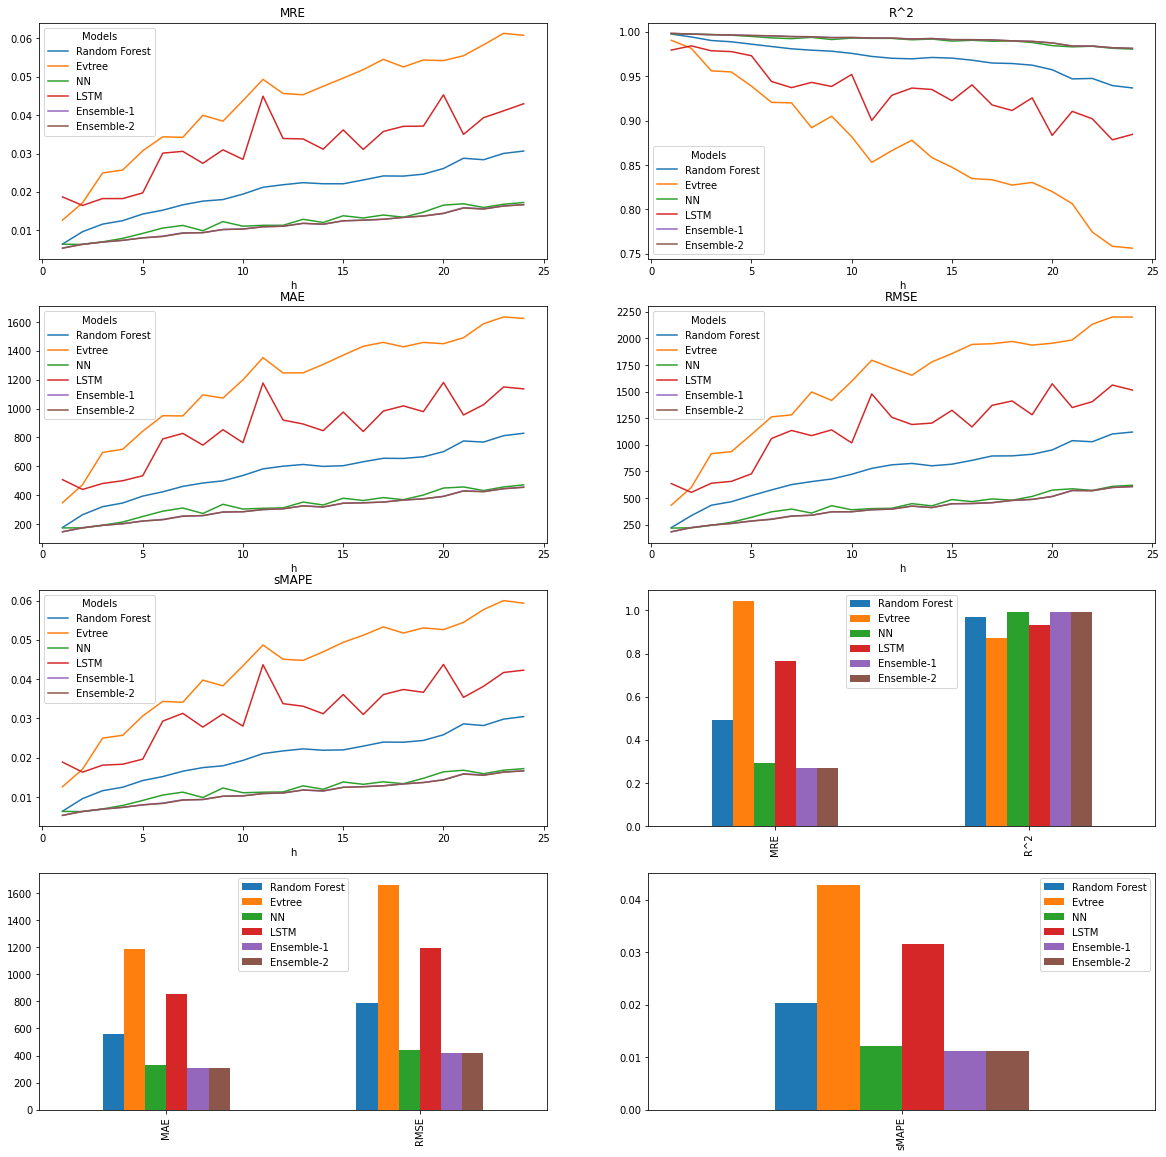

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,2, figsize = (20,20))
fig.figure
for i,m in enumerate(measures):
    detailed[m].plot(title = m, ax = ax[i//2, i%2])
overall[['MRE', 'R^2']].T.plot.bar(ax = ax[2,1])
ax[2,1].legend(loc="upper center")
overall[['MAE', 'RMSE']].T.plot.bar(ax = ax[3,0])
ax[3,0].legend(loc="upper center")
overall[['sMAPE']].T.plot.bar(ax = ax[3,1])